[sklearn](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html)

In [1]:
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

# people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# print(type(people))
# print(dir(people))
# print()

# print(people.DESCR)
# print()

# print(type(people.data))
# print(type(people.images))
# print(type(people.target))
# print(type(people.target_names), people.target_names)
# print()

print(people.data.shape)
print(people.images.shape)
print(people.target.shape)
print()

# for i in range(5):
#     plt.imshow(people.images[i])
#     plt.title(people.target_names[people.target[i]])
#     plt.show()

(1288, 1850)
(1288, 50, 37)
(1288,)



In [4]:
from sklearn.model_selection import train_test_split

x = people.data
y = people.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

/Users/sungchullee/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.3682170542635659


In [6]:
model = SVC(C=10)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

/Users/sungchullee/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.3682170542635659


In [13]:
model = SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

0.43410852713178294


(1030, 1850) (258, 1850)
(1030, 150) (258, 150)


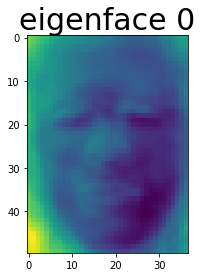

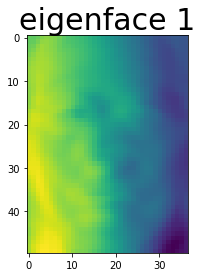

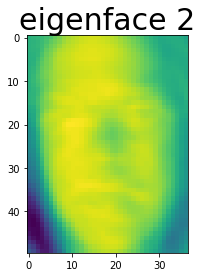

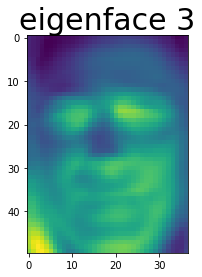

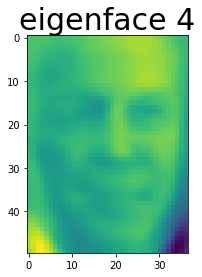

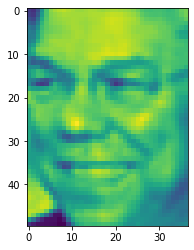

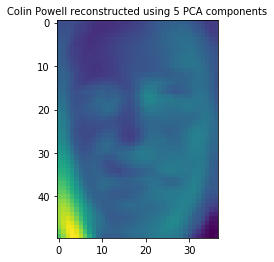

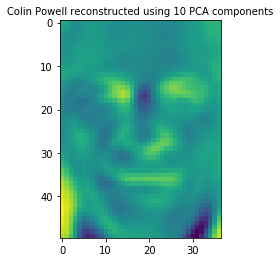

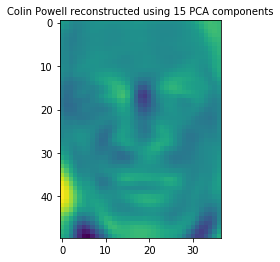

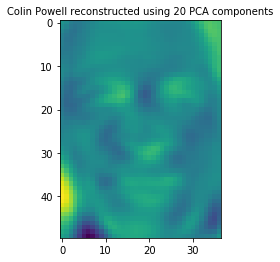

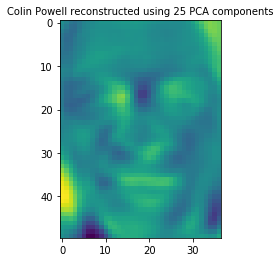

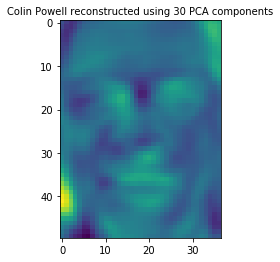

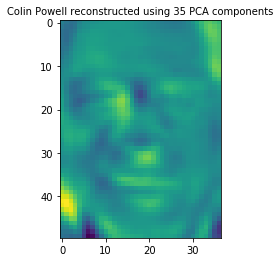

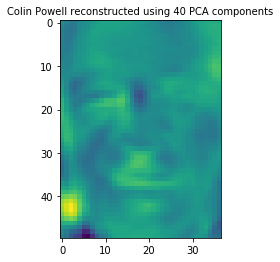

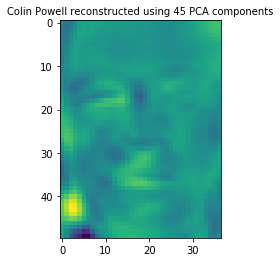

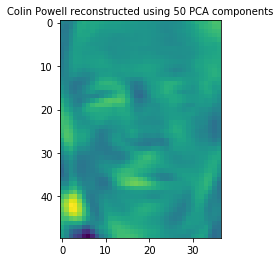

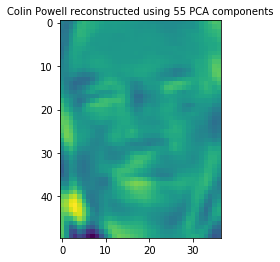

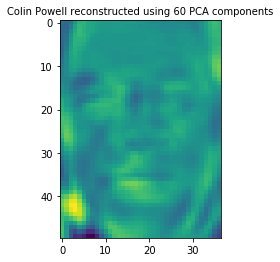

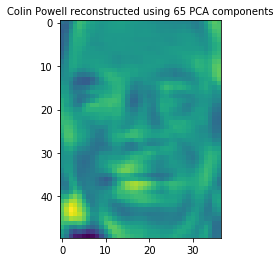

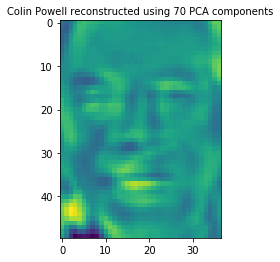

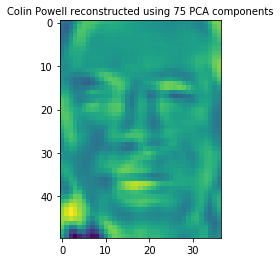

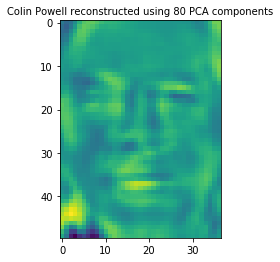

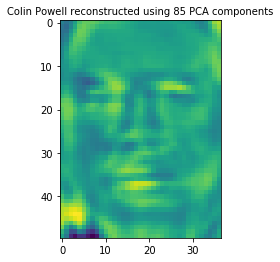

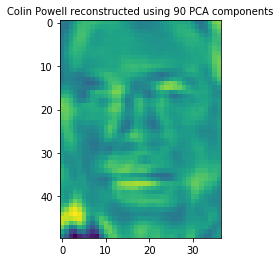

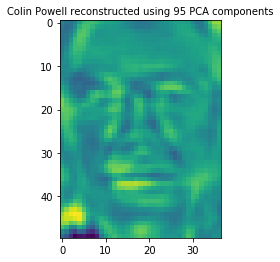

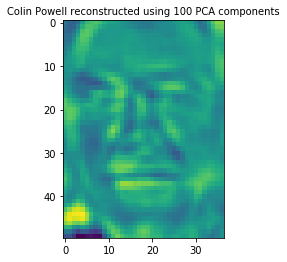

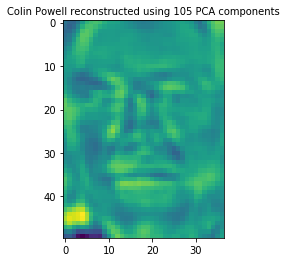

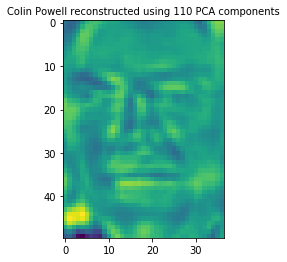

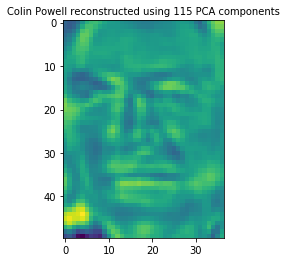

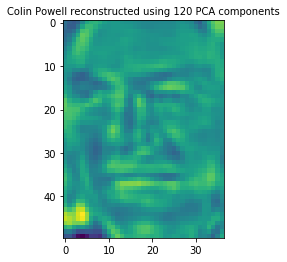

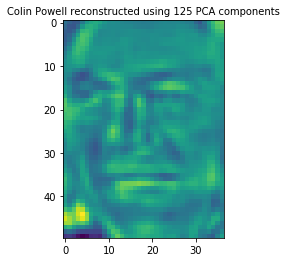

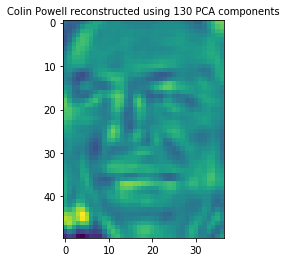

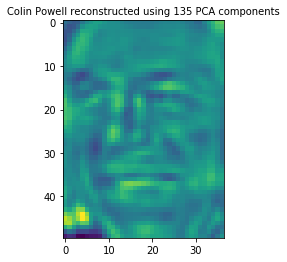

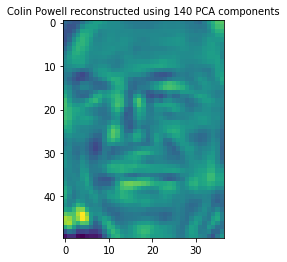

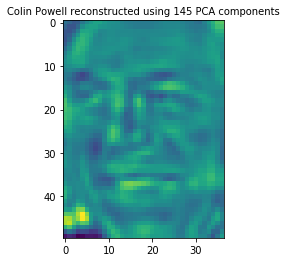

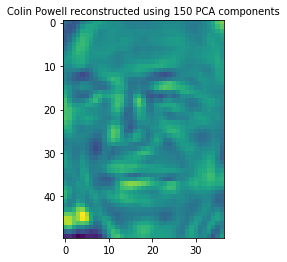

0.8643410852713178


In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

n_components = 150
n_samples, h, w = people.images.shape

pca = PCA(n_components=n_components, 
          svd_solver='randomized',
          whiten=True).fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train.shape, x_test.shape)
print(x_train_pca.shape, x_test_pca.shape)

eigenfaces = pca.components_.reshape((n_components, h, w))
for i in range(5):
    plt.imshow(eigenfaces[i])
    plt.title('eigenface {}'.format(i), fontsize=30)
    plt.show()
    
plt.imshow(x_test[0].reshape((h, w)))
plt.show()

tmp = 0
for i in range(150):
    tmp += x_test_pca[0, i] * eigenfaces[i]
    if i % 5 == 4:
        plt.imshow(tmp)
        plt.title('Colin Powell reconstructed using {} PCA components'.format(i+1), fontsize=10)
        plt.show()

model = SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
model.fit(x_train_pca, y_train)
print(model.score(x_test_pca, y_test))

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(x_train_pca, y_train)
print(clf.best_estimator_)
print(clf.score(x_test_pca, y_test))

n_classes = len(people.target_names)
y_pred = clf.predict(x_test_pca)
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
print(classification_report(y_test, y_pred, target_names=people.target_names))

SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.8643410852713178
[[  7   2   0   2   0   0   0]
 [  0  45   0   2   0   0   0]
 [  0   1  19   2   0   0   0]
 [  0   6   0 106   0   0   0]
 [  0   4   1   3  16   0   1]
 [  0   3   0   2   0   8   1]
 [  0   2   0   3   0   0  22]]
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.64      0.78        11
     Colin Powell       0.71      0.96      0.82        47
  Donald Rumsfeld       0.95      0.86      0.90        22
    George W Bush       0.88      0.95      0.91       112
Gerhard Schroeder       1.00      0.64      0.78        25
      Hugo Chavez       1.00      0.57      0.73        14
       Tony Blair       0.92      0.81      0.86        27

         accuracy                           0.86  

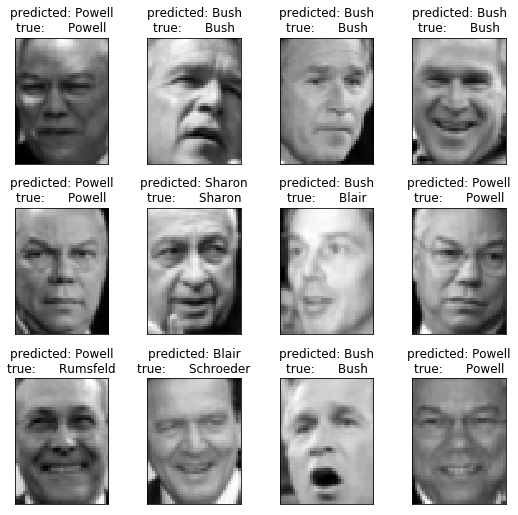

In [9]:
import matplotlib.pyplot as plt

n_samples, h, w = people.images.shape

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

target_names = people.target_names
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(x_test, prediction_titles, h, w)